In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
heart = pd.read_csv('heart.csv')  
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data headings and description

*   **age** - age in years
*   **sex** - (1 = male; 0 = female)
*   **cp** - chest pain type
*   **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
*   **chol** - serum cholestoral in mg/dl
*   **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   **restecg** - resting electrocardiographic results
*   **thalach** - maximum heart rate achieved
*   **exang** - exercise induced angina (1 = yes; 0 = no)
*   **oldpeak** - ST depression induced by exercise relative to rest
*   **slope** - the slope of the peak exercise ST segment
*   **ca** - number of major vessels (0-3) colored by flourosopy
*   **thal** - 3 = normal; 6 = fixed defect; 7 = reversable defect
*   **target** - have disease or not (1=yes, 0=no)

In [ ]:
df = heart[['age','sex', 'trestbps','chol', 'fbs', 'target']]
df.head()

,age,sex,trestbps,chol,fbs,target
0,63,1,145,233,1,1
1,37,1,130,250,0,1
2,41,0,130,204,0,1
3,56,1,120,236,0,1
4,57,0,120,354,0,1


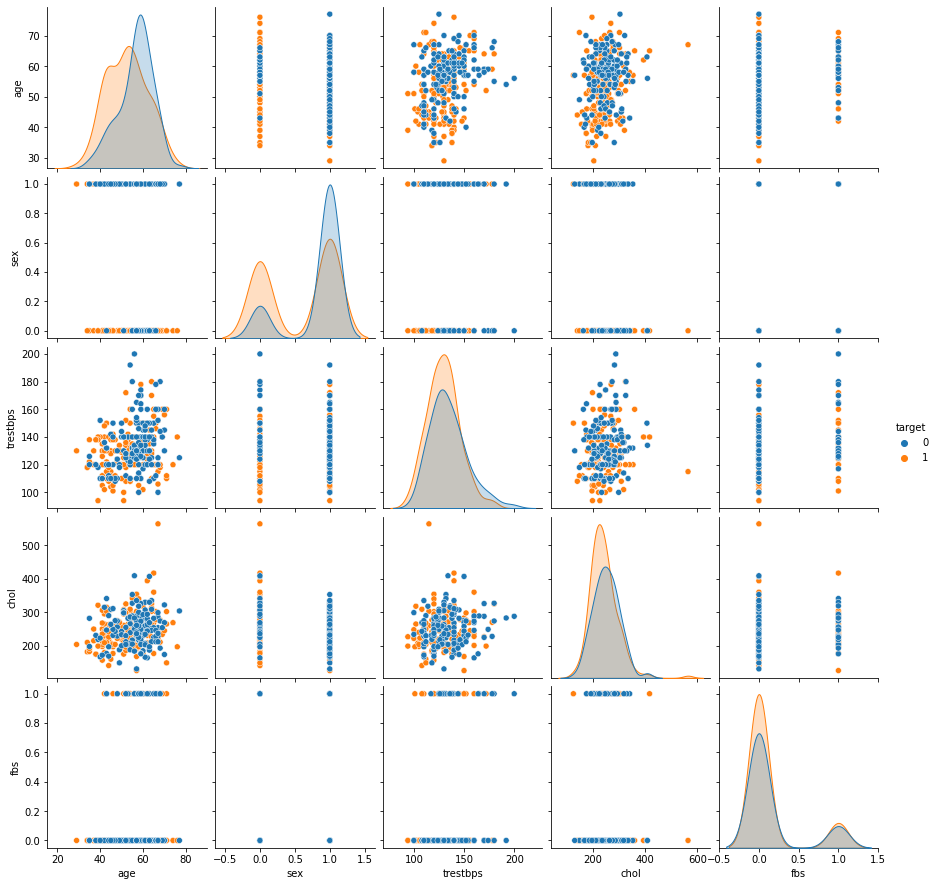

In [ ]:
sns.pairplot(df, hue= 'target')

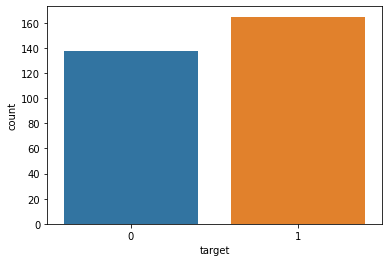

In [ ]:
sns.countplot(x="target", data=df)
plt.show()

In [ ]:
noheart=len(df[df.target==0])
print(noheart)

138


In [ ]:
haveheart=len(df[df.target==1])
print(haveheart)

165


In [ ]:
# Variables
x_data= df.drop(labels= 'target', axis= 1)
y= df['target']

#Data Normalisation
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

# Splitting the Dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 101)

In [ ]:
# Instantiating LogisticRegression() Model
lor = LogisticRegression()

# Training/Fitting the Model
lor.fit(x_train,y_train)

# Making Predictions
lor.predict(x_test)
pred = lor.predict(x_test)

#Accuracy of the model
acc = lor.score(x_test,y_test)*100

print("Test Accuracy {:.2f}%".format(acc))

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Test Accuracy 77.05%
Mean Absolute Error: 0.22950819672131148
Mean Squared Error: 0.22950819672131148
Mean Root Squared Error: 0.47907013758040845


In [ ]:
# Instantiating KNeighborsClassifier() Model
knn = KNeighborsClassifier(n_neighbors = 2) 

# Training/Fitting the Model
knn.fit(x_train, y_train)

# Making Predictions
knn.predict(x_test)
pred = knn.predict(x_test)

#Accuracy of the model
acc = knn.score(x_test,y_test)*100

print("Test Accuracy {:.2f}%".format(acc))

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))    

Test Accuracy 54.10%
Mean Absolute Error: 0.45901639344262296
Mean Squared Error: 0.45901639344262296
Mean Root Squared Error: 0.6775074858941582


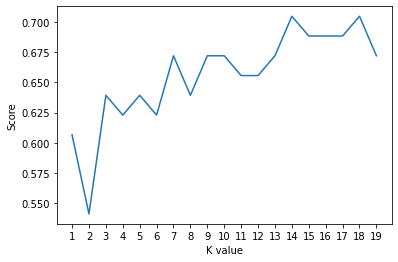

Maximum KNN Score is 70.49% at the nearest neighbours value 14


In [ ]:
# try to find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
maxpos = scoreList.index(max(scoreList))+1
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}% at the nearest neighbours value {}".format(acc, maxpos))

In [ ]:
# Instantiating SVC() Model
svm = SVC(random_state = 1)

# Training/Fitting the Model
svm.fit(x_train, y_train)

# Making Predictions
svm.predict(x_test)
pred = svm.predict(x_test)

#Accuracy of the model
acc = svm.score(x_test,y_test)*100

print("Test Accuracy {:.2f}%".format(acc))

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))  

Test Accuracy 70.49%
Mean Absolute Error: 0.29508196721311475
Mean Squared Error: 0.29508196721311475
Mean Root Squared Error: 0.5432144762551112


In [ ]:
# Instantiating DecisionTreeClassifier() Model
dtc = DecisionTreeClassifier()

# Training/Fitting the Model
dtc.fit(x_train, y_train)

# Making Predictions
dtc.predict(x_test)
pred = dtc.predict(x_test)

#Accuracy of the model
acc = dtc.score(x_test,y_test)*100

print("Test Accuracy {:.2f}%".format(acc))

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))  

Test Accuracy 59.02%
Mean Absolute Error: 0.4098360655737705
Mean Squared Error: 0.4098360655737705
Mean Root Squared Error: 0.6401843996644799


In [ ]:
# Instantiating RandomForestClassifier() Model
rf = RandomForestClassifier(n_estimators = 1000, random_state = 101)

# Training/Fitting the Model
rf.fit(x_train, y_train)

# Making Predictions
rf.predict(x_test)
pred = rf.predict(x_test)

#Accuracy of the model
acc = rf.score(x_test,y_test)*100

print("Test Accuracy {:.2f}%".format(acc))

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))  

Test Accuracy 65.57%
Mean Absolute Error: 0.3442622950819672
Mean Squared Error: 0.3442622950819672
Mean Root Squared Error: 0.5867386940384682
